# 1. Import Necessary Libray

In [ ]:
!pip install stopwords
!pip install flair
!pip install nltk
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 78.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 62.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pypro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.7 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16299 sha256=2f4f5beec7031c433f9f7d787073e4f3c5c9cf18d2898db5581b6777e864a2f9
  Stored in directory: /root/.cache/pip/wheels/6c/bd/3e/2d6afc9bc36c9975f8e4215a270bbac6580c4361ebd6bb2323
Successfully built swifter


# 2. Import Library


In [ ]:
import pandas as pd
import re

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
nltk.download('stopwords')

import flair
from flair.data import Sentence


import numpy as np
import random as rn

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from collections import Counter
from PIL import Image

# SK LEARN
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


# BERT
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tokenizers import BertWordPieceTokenizer

import transformers
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

import logging
transformers.logging.set_verbosity_error()

from google.colab import files

pd.options.display.max_rows = None
seed=40

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 3. Import Amazon Reviews Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rn.seed(a=40) # Random Seed
path = "/content/drive/MyDrive/Colab Notebooks/Dataset_Amazon_Product_Review.csv"

p = 0.1 #  It represents the proportion of data to be included in the subsample, 0.1 mean we get 10%
review = pd.read_csv(path, skiprows=lambda i: i > 0 and rn.random() > p) # take data from dataset
review.shape # output total rows and column

(56733, 10)

In [ ]:

# make a function to determine a score
# 1 means negative
# 0 means positive

def determine_score(score):
    if(score >= 3): 
        return 1
    else:
        return 0

# add new column (Review Score) to the data frame review, so now we have 11 column
review['review_score']= review.Score.apply(determine_score)

# rename text column to be review text
review = review.rename(columns={'Text':'review_text'})

# as you can see from table below, we add new column (review_score) and we replace the column text to be review_text
review.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,review_text,review_score
0,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
1,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1
2,26,B001GVISJM,A3FONPR03H3PJS,"Deborah S. Linzer ""Cat Lady""",0,0,5,1288310400,Twizzlers - Strawberry,Product received is as advertised.<br /><br />...,1
3,41,B001EO5QW8,AQCY5KRO7489S,Garrett,0,0,5,1303430400,Why wouldn't you buy oatmeal from Mcanns? Tast...,The variety packs taste great!<br /><br />I ha...,1
4,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,1209686400,Great taste and convenience,We really like the McCann's steel cut oats but...,1
5,50,B001EO5QW8,A276999Y6VRSCQ,JMay,0,1,3,1334016000,Same stuff,This is the same stuff you can buy at the big ...,1
6,59,B004N5KULM,A2A7KXM9B4XW90,"P. Kelso ""Amazon all the way!""",0,0,5,1320364800,Awsome - Kids in neighborhood loved us!,"Great product, nice combination of chocolates ...",1
7,60,B004N5KULM,A2QOGOXPOVKAJG,mimimc,0,0,5,1320105600,great deal.,"Halloween is over but, I sent a bag to my daug...",1
8,68,B005DUM9UQ,A8OFFIAL6XTOH,Bill Shirer,0,1,2,1338422400,Taste is not so good.,"I purchased the Mango flavor, and to me it doe...",0
9,81,B0066DMI6Y,AB30HQTI5VOLR,Melinda Bishop,1,1,5,1325116800,Delicious!,This peppermint stick is delicious and fun to ...,1


# 4. Analysis and Visualization

## 4.1 Distribution of Number of Review Words

<Axes: xlabel='Num_word_review', ylabel='Count'>

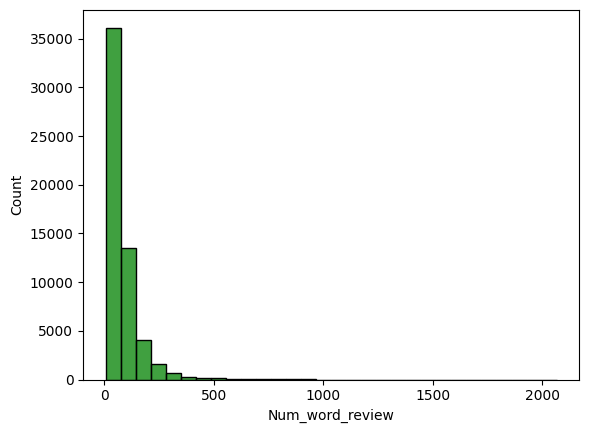

In [ ]:
# sns.histplot(data=review, x="review_text", bins=30, color='blue')

review_vis = review.copy()
review_vis['Num_word_review'] = review_vis['review_text'].apply(lambda x:len(str(x).split()))

sns.histplot(data=review_vis, x="Num_word_review",bins=30,color='green')

## 4.2 Distribution of Words in All Review Texts

In [ ]:
review_vis['temp_list'] = review_vis['review_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,162221
1,I,138371
2,and,122481
3,a,115814
4,to,98518
5,of,78365
6,is,71102
7,it,62483
8,for,52010
9,in,50791


## 4.3 Distribution of Reviews in Each Sentiment

<Axes: xlabel='review_score', ylabel='count'>

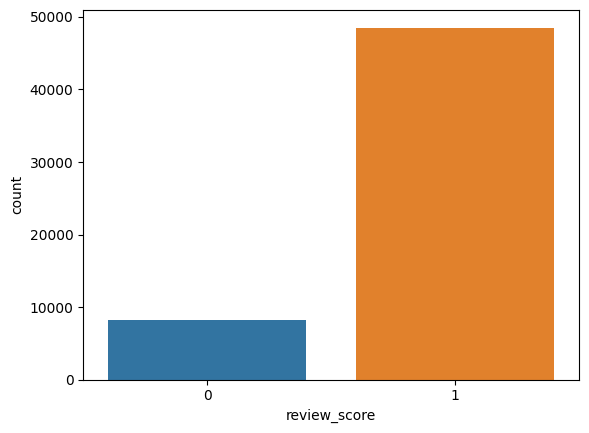

In [ ]:
# Do grouping based on review score and review text

grouping = review.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_text',ascending=False)

# Visualize using bar chart
sns.countplot(x='review_score', data=review)

# from bar chart below, we can see that there are more positive sentiment reviews than negative sentiment reviews

# 5. Data proccessing (Cleaning Data)

## 5.1 Before Clean Data

In [ ]:
review[['review_text']].head(20)

,review_text
0,This is a confection that has been around a fe...
1,I don't know if it's the cactus or the tequila...
2,Product received is as advertised.<br /><br />...
3,The variety packs taste great!<br /><br />I ha...
4,We really like the McCann's steel cut oats but...
5,This is the same stuff you can buy at the big ...
6,"Great product, nice combination of chocolates ..."
7,"Halloween is over but, I sent a bag to my daug..."
8,"I purchased the Mango flavor, and to me it doe..."
9,This peppermint stick is delicious and fun to ...


## 5.2 Define A Function To Clean The Data

In [ ]:
# Function To Cleaning Duplicate Values

def remove_duplicate_values(data):
    data = data.drop_duplicates(keep='first')
    return data

# Function To Remove Some basic characters (include html tag)

def remove_basic_characters(data):
    data = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', data)
    data = re.sub('&gt;', "", data)
    data = re.sub('&#x27;', "'", data)
    data = re.sub('&quot;', '"', data)
    data = re.sub('&#x2F;', ' ', data)
    data = re.sub('&#62;', '', data)
    data = re.sub('</i>', '', data)
    data = re.sub('<p>', ' ', data)
    data = re.sub('<i>', ' ', data)
    data = re.sub('<br>', ' ', data)
    data = re.sub('br', ' ', data)
    data = re.sub("\n", '', data)
    return data

# Function To Remove Number
def remove_number(data):
    data = re.sub(r'\d+', '', data)
    return data

# Function To Remove Punctuation
def remove_punctuation(text):
    data = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return data

# Function To Cleaning White Space
def remove_white_space(data):
    data = re.sub(' +', ' ', data)
    return data

# Function To Remove Symbols
def remove_symbols(data):
    data = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', data)
    return data


# Function To Use Stemming To Normalize Words
def Stemming(data):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(data)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

# Function To Remove Stop words

def remove_stopword(data):
    stop = set(stopwords.words("english"))
    stemmer = PorterStemmer()
    lemma = WordNetLemmatizer()   
    data = [word.lower() for word in data.split() if word.lower() not in stop]
    return " ".join(data)

## 5.3 Combine All The Cleaning Functions

In [ ]:
def clean_data(dataFrame, columnName):
    dataFrame[columnName] = dataFrame[columnName].apply(remove_basic_characters) # 1. Remove some basic characters
    dataFrame[columnName] = dataFrame[columnName].str.lower() # 2. change the sentence to lower characters
    dataFrame[columnName] = dataFrame[columnName].apply(remove_number) # 3. remove number in the word
    dataFrame[columnName] = dataFrame[columnName].apply(remove_symbols) # 4. remove symbols in the word
    dataFrame[columnName] = dataFrame[columnName].apply(remove_punctuation) # 5. remove punctuation in the word (':', '?' , '!', etc)
    dataFrame[columnName] = dataFrame[columnName].apply(remove_stopword) # 6. remove stop words, these words, such as "a," "an," "the," "is," "and," etc.
    dataFrame[columnName] = dataFrame[columnName].apply(remove_white_space) # 7. remove white spice from (Hello     World) to be (Hello Word)

clean_data(review, 'review_text')

## 5.4 Result After Cleaning Data

In [ ]:
review[['review_text']].head(20)

,review_text
0,confection around centuries light pillowy citr...
1,know cactus tequila unique combination ingredi...
2,product received advertised link
3,variety packs taste great every morning cents ...
4,really like mccann steel cut oats find cook of...
5,stuff buy big box stores nothing healthy carbs...
6,great product nice combination chocolates perf...
7,halloween sent bag daughters class share choco...
8,purchased mango flavor take like mango hint sw...
9,peppermint stick delicious fun eat dad got one...


## 5.5 Distribution of Words in All Review Texts (After Cleaning Data)

In [ ]:
review_vis2 = review.copy()

review_vis2['temp_list'] = review_vis2['review_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis2['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

,Common_words,count
0,like,25624
1,good,20004
2,taste,17342
3,one,17231
4,great,16743
5,coffee,16248
6,product,15012
7,flavor,14743
8,tea,13534
9,love,12774


### We can see that the word "like", "good", "taste" are the top 3 common words

# 6. Bert Tokenize And Modeling

# 6.1 Split the data for training, validation, and hold-out data

In [ ]:
reviews = review["review_text"].values.tolist()
labels = review["review_score"].tolist()

# split the dataset into train, validation and holdout sets (60-20-20)
training_sentences, test_sentences, training_labels, test_labels = train_test_split(reviews, labels, test_size=.4)

# The test_size=.4 argument indicates that 40% of the data will be allocated to the test set, 
# while the remaining 60% will be assigned to the training set. 
# The function returns four variables: 
# 1. training_sentences (containing the reviews for the training set), 
# 2. test_sentences (containing the reviews for the test set), 
# 3. training_labels (containing the corresponding labels for the training set), 
# 4. test_labels (containing the corresponding labels for the test set).


validation_sentences, holdout_sentences, validation_labels, holdout_labels = train_test_split(test_sentences, test_labels, test_size=.5)

# 6.2 Tokenize the input data

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# Example of the tokenizer output
tokenizer([training_sentences[0]], truncation=True, padding=True, max_length=512)



{'input_ids': [[101, 5095, 1701, 1402, 6790, 3538, 1793, 6164, 3820, 1403, 3538, 1116, 1141, 1677, 1436, 1562, 1618, 7352, 1974, 2844, 6548, 3538, 1838, 1285, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
# tokenize training for validation and hold-out Texts

train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)

validation_encodings = tokenizer(validation_sentences,
                            truncation=True,
                            padding=True)

holdout_encodings = tokenizer(holdout_sentences,
                            truncation=True,
                            padding=True)

# convert the input encodings and labels into a TensorFlow Dataset object
train_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(train_encodings),
                            training_labels
                            ));

validation_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(validation_encodings),
                            validation_labels
                            ));

holdout_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(holdout_encodings),
                            holdout_labels
                            ));

# 6.3 BERT Model fine tuning

In [ ]:
# Initialize our pre-trained BERT model

model = TFBertForSequenceClassification.from_pretrained('bert-base-cased',num_labels=2)

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
# model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

# Train and fine tune our pre-trained BERT model

history = model.fit(train_dataset.shuffle(100).batch(8),
          epochs=3,
          batch_size=8,
          validation_data=validation_dataset.shuffle(100).batch(8), verbose=1)



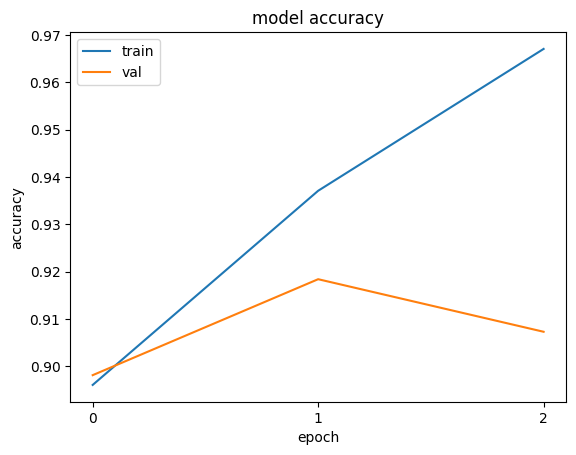

In [ ]:
from matplotlib.ticker import MaxNLocator

# Plot train and validation accuracy

ax = plt.figure().gca()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# We save the model

model.save_pretrained("./output_model")

# 6.4 BERT Model performance evaluation

In [1]:
# load the model and then evaluate it on holdout set

loaded_model = TFBertForSequenceClassification.from_pretrained("./output_model")
result = model.evaluate(holdout_dataset.batch(8))
dict(zip(model.metrics_names, result))

# Then predict the sentiment for holdout set

tf_output = loaded_model.predict(holdout_dataset.batch(8))
pred_label = tf.argmax(tf.nn.softmax(tf_output["logits"], axis=1).numpy(), 1).numpy()

NameError: ignored

In [ ]:
# After that create the confusion matrix of our predictions

cm = tf.math.confusion_matrix(
    holdout_labels, pred_label, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
).numpy()

print("confusion matrix\n",cm)

# visualize the confusion matrix

cm_norm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

cm_df = pd.DataFrame(cm_norm,
                 index = [0,1], 
                 columns =[0,1])

figure = plt.figure(figsize=(4, 4))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(holdout_labels, pred_label)))
print("\nAUC score : {:.4f}".format(roc_auc_score(holdout_labels, pred_label)))
print("\nClassification report : \n", classification_report(holdout_labels, pred_label))

# Precision, Recall, and F1-Score

# tp = cm[0][0]
# fn = cm[0][1]

# tn = cm[1][1]
# fp = cm[1][0]

# recall = round(tp / (tp+fn), 2)
# precision = round(tp / (tp+fp), 2)
# f1score = (2*precision*recall) / (precision + recall)

# print("recall score:", recall)
# print("precision score:", precision)
# print("F1-Score:",f1score)